<h2>Carregamento dos dados</h2>

<p>O ETL gerou um banco SQLite no qual faremos uma análise exploratória</p>

In [14]:
import pandas as pd
import sqlite3

# Carregando os dados
con = sqlite3.connect("datasets/estoque_cartoes.db")
query = "SELECT * FROM estoque_cartoes"
df = pd.read_sql(query, con)
con.close()

In [15]:
df

,trimestre,nomebandeira,nomefuncao,produto,qtdcartoesemitidos,qtdcartoesativos
0,20231,American Express,Crédito,Empresarial,26598,18382
1,20211,American Express,Crédito,Intermediário,574163,348180
2,20231,American Express,Crédito,Corporativo,68432,49995
3,20221,American Express,Crédito,Empresarial,21948,16437
4,20233,American Express,Crédito,Empresarial,27741,19039
...,...,...,...,...,...,...
95,20202,VISA,Débito,Empresarial,1561727,588688
96,20202,VISA,Débito,Outros,208,87
97,20243,VISA,Pré-Pago,Empresarial,1682123,559847
98,20201,VISA,Pré-Pago,Empresarial,1418,1082


<h2>Informações gerais do dataset</h2>

Resumo do DataFrame

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trimestre           100 non-null    object
 1   nomebandeira        100 non-null    object
 2   nomefuncao          100 non-null    object
 3   produto             100 non-null    object
 4   qtdcartoesemitidos  100 non-null    int64 
 5   qtdcartoesativos    100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [17]:
df.isnull().sum()

trimestre             0
nomebandeira          0
nomefuncao            0
produto               0
qtdcartoesemitidos    0
qtdcartoesativos      0
dtype: int64

Estatísticas Descritivas

In [7]:
df.describe(include='all')

,trimestre,nomebandeira,nomefuncao,produto,qtdcartoesemitidos,qtdcartoesativos
count,100,100,100,100,1.000000e+02,1.000000e+02
unique,24,7,3,8,NaN,NaN
top,20232,MasterCard,Crédito,Empresarial,NaN,NaN
freq,9,42,48,22,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.228557e+07,5.191420e+06
std,NaN,NaN,NaN,NaN,2.874323e+07,1.124154e+07
min,NaN,NaN,NaN,NaN,2.080000e+02,0.000000e+00
25%,NaN,NaN,NaN,NaN,2.345598e+05,1.044470e+05
50%,NaN,NaN,NaN,NaN,1.773146e+06,6.026055e+05
75%,NaN,NaN,NaN,NaN,7.786787e+06,3.921194e+06


<h2>Análise Exploratória - Estoque de Cartões</h2>

<p>Com os dados obtidos vamos fazer uma análise exploratória e entender um pouco</p>

Totais de Cartões Emitidos e Ativos

In [18]:
total_emitidos = df['qtdcartoesemitidos'].sum()
total_ativos = df['qtdcartoesativos'].sum()
proporcao_ativos = total_ativos / total_emitidos * 100
proporcao_inativos = 100 - proporcao_ativos

print(f"Total de cartões emitidos: {total_emitidos:,}")
print(f"Total de cartões ativos: {total_ativos:,}")
print(f"Proporção de cartões ativos: {proporcao_ativos:.2f}%")
print(f"Proporção de cartões inativos: {proporcao_inativos:.2f}%")

Total de cartões emitidos: 1,228,557,020
Total de cartões ativos: 519,142,005
Proporção de cartões ativos: 42.26%
Proporção de cartões inativos: 57.74%


<h4>Gráfico de Barras – Comparação entre emitidos e ativos</h4>

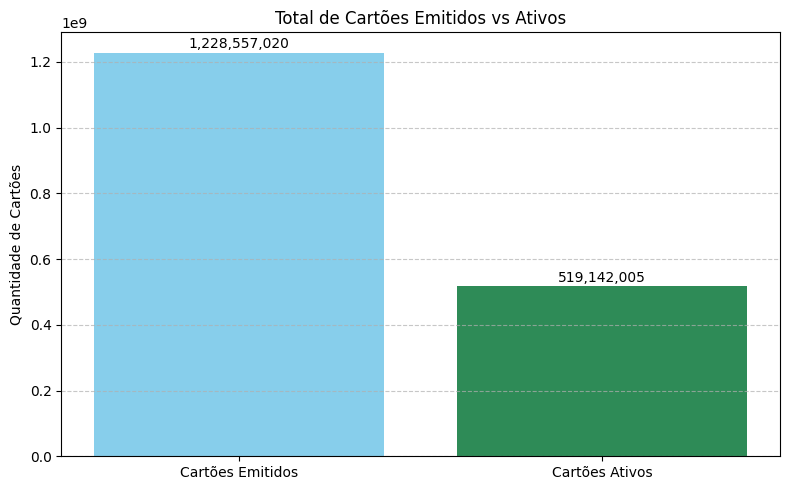

In [19]:
import matplotlib.pyplot as plt

valores = [total_emitidos, total_ativos]
categorias = ['Cartões Emitidos', 'Cartões Ativos']

plt.figure(figsize=(8, 5))
plt.bar(categorias, valores, color=['skyblue', 'seagreen'])
plt.title('Total de Cartões Emitidos vs Ativos')
plt.ylabel('Quantidade de Cartões')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(valores):
    plt.text(i, valor + max(valores)*0.01, f"{valor:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<h4>Media de cartões ativos e emitidos</h4>

In [20]:
print("Média de cartões emitidos:", df["qtdcartoesemitidos"].mean())
print("Média de cartões ativos:", df["qtdcartoesativos"].mean())

Média de cartões emitidos: 12285570.2
Média de cartões ativos: 5191420.05


<h4>Gráfico de Barras – Médias de Cartões Emitidos vs Ativos</h4>

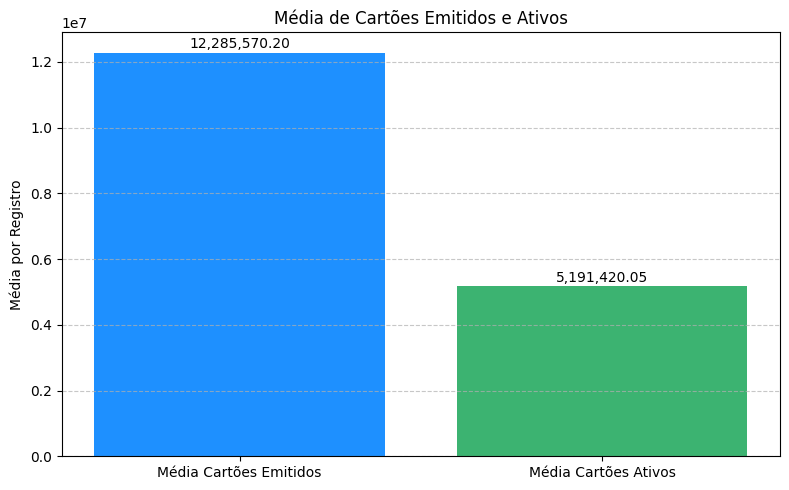

In [11]:
media_emitidos = df["qtdcartoesemitidos"].mean()
media_ativos = df["qtdcartoesativos"].mean()

medias = [media_emitidos, media_ativos]
categorias = ['Média Cartões Emitidos', 'Média Cartões Ativos']

plt.figure(figsize=(8, 5))
plt.bar(categorias, medias, color=['dodgerblue', 'mediumseagreen'])
plt.title('Média de Cartões Emitidos e Ativos')
plt.ylabel('Média por Registro')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(medias):
    plt.text(i, valor + max(medias)*0.01, f"{valor:,.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<h4>Top 5 Bandeiras com Mais Cartões Emitidos</h4>

In [12]:
top_bandeiras = df.groupby("nomebandeira")["qtdcartoesemitidos"].sum().sort_values(ascending=False).head(5)

print("-" * 45)
for bandeira, valor in top_bandeiras.items():
    print(f" - {bandeira}: {valor:,} cartões")
print("-" * 45)

---------------------------------------------
 - MasterCard: 556,323,112 cartões
 - VISA: 520,465,053 cartões
 - Elo: 121,359,969 cartões
 - Bandeira própria: 24,179,327 cartões
 - Outras: 3,568,614 cartões
---------------------------------------------


<h4>Gráfico de Barras Horizontal – Top 5 Bandeiras por Cartões Emitidos</h4>

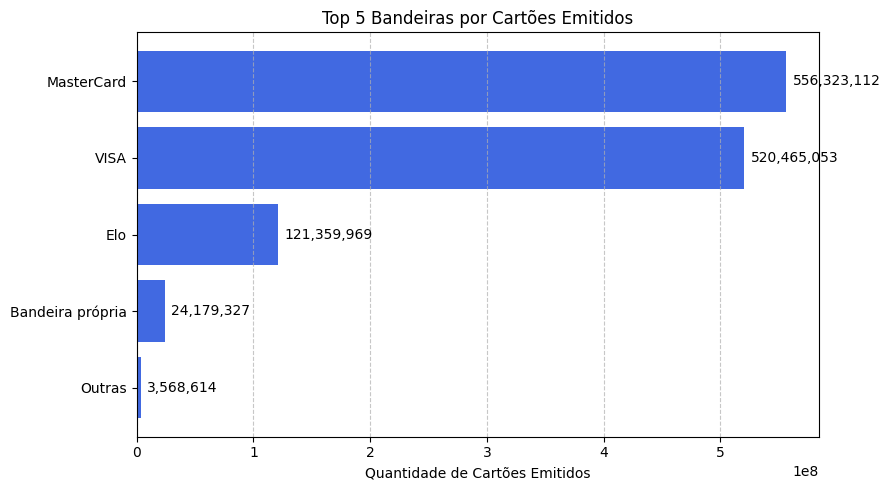

In [13]:
top_bandeiras = df.groupby("nomebandeira")["qtdcartoesemitidos"].sum().sort_values(ascending=False).head(5)

bandeiras = top_bandeiras.index
valores = top_bandeiras.values

plt.figure(figsize=(9, 5))
plt.barh(bandeiras, valores, color='royalblue')
plt.title('Top 5 Bandeiras por Cartões Emitidos')
plt.xlabel('Quantidade de Cartões Emitidos')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, valor in enumerate(valores):
    plt.text(valor + max(valores)*0.01, i, f"{valor:,}", va='center')

plt.tight_layout()
plt.show()

<h4>Top Funções de Cartão (por Cartões Emitidos)</h4>

In [14]:
top_funcoes = df.groupby("nomefuncao")["qtdcartoesemitidos"].sum().sort_values(ascending=False).head(5)

print("-" * 45)
for funcao, valor in top_funcoes.items():
    print(f" - {funcao}: {valor:,} cartões")
print("-" * 45)

---------------------------------------------
 - Débito: 703,252,317 cartões
 - Crédito: 441,115,113 cartões
 - Pré-Pago: 84,189,590 cartões
---------------------------------------------


<h4>Gráfico de Barras Horizontal – Top Funções de Cartão (por Cartões Emitidos)</h4>

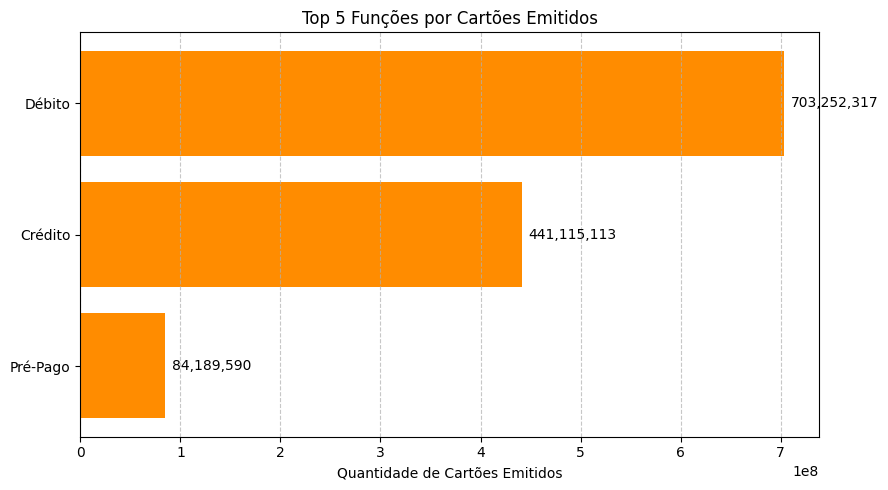

In [15]:
top_funcoes = df.groupby("nomefuncao")["qtdcartoesemitidos"].sum().sort_values(ascending=False).head(5)

funcoes = top_funcoes.index
valores = top_funcoes.values

plt.figure(figsize=(9, 5))
plt.barh(funcoes, valores, color='darkorange')
plt.title('Top 5 Funções por Cartões Emitidos')
plt.xlabel('Quantidade de Cartões Emitidos')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, valor in enumerate(valores):
    plt.text(valor + max(valores)*0.01, i, f"{valor:,}", va='center')

plt.tight_layout()
plt.show()


<h4>Top 5 Produtos</h4>

In [16]:
top_produtos = df.groupby("produto")["qtdcartoesemitidos"].sum().sort_values(ascending=False).head(5)

print("-" * 45)
for produto, valor in top_produtos.items():
    print(f" - {produto}: {valor:,} cartões")
print("-" * 45)

---------------------------------------------
 - Básico Internacional: 652,048,078 cartões
 - Intermediário: 284,908,533 cartões
 - Outros: 140,330,960 cartões
 - Platinum: 62,025,765 cartões
 - Empresarial: 41,600,465 cartões
---------------------------------------------


<h4>Gráfico de Barras Horizontal – Top 5 Produtos por Cartões Emitidos</h4>

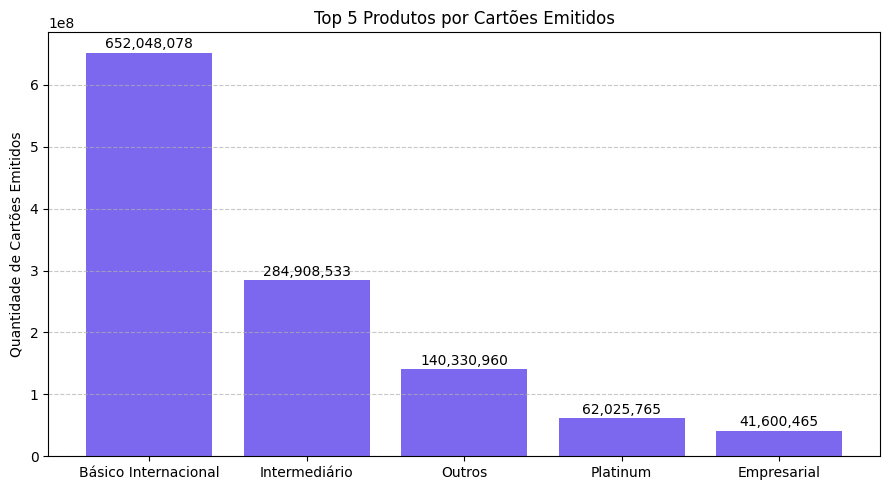

In [17]:
top_produtos = df.groupby("produto")["qtdcartoesemitidos"].sum().sort_values(ascending=False).head(5)

produtos = top_produtos.index
valores = top_produtos.values

plt.figure(figsize=(9, 5))
plt.bar(produtos, valores, color='mediumslateblue')
plt.title('Top 5 Produtos por Cartões Emitidos')
plt.ylabel('Quantidade de Cartões Emitidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(valores):
    plt.text(i, valor + max(valores)*0.01, f"{valor:,}", ha='center')

plt.tight_layout()
plt.show()

<h4>Filtragem e agregação dos dados</h4>

Filtramos os dados para considerar apenas a função **"Crédito"** e, em seguida, agrupamos a quantidade de cartões emitidos por trimestre. Esses dados serão utilizados para gerar o gráfico.

In [ ]:
df_credito = df[df["nomefuncao"] == "Crédito"]

df_emitidos = df_credito.groupby("trimestre")["qtdcartoesemitidos"].sum().sort_index()

trimestres = df_emitidos.index
valores = df_emitidos.values

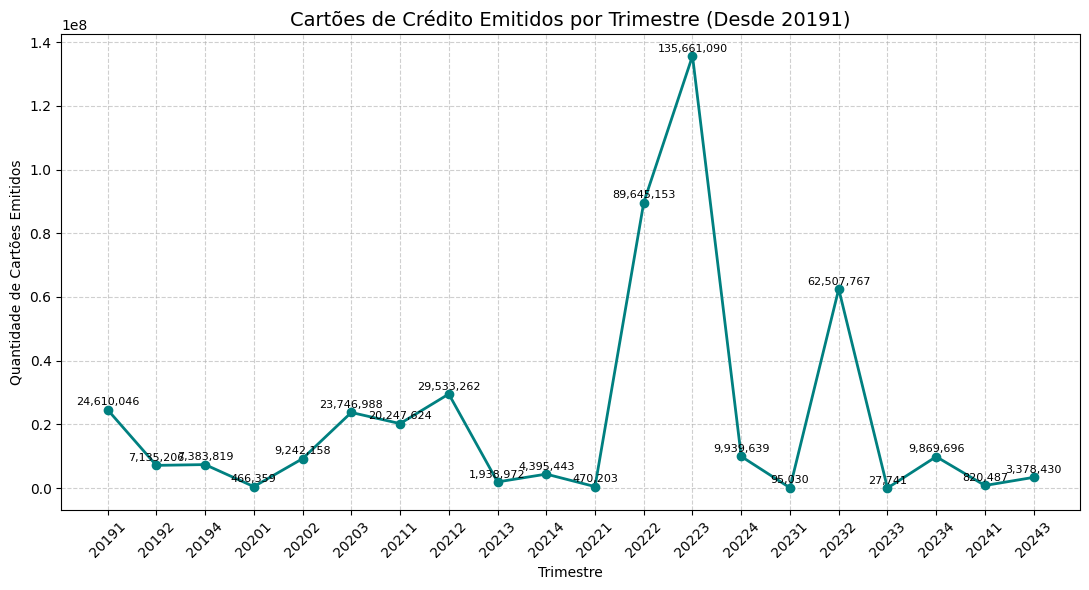

In [25]:
plt.figure(figsize=(11, 6))
plt.plot(trimestres, valores, marker='o', color='teal', linewidth=2)
plt.title('Cartões de Crédito Emitidos por Trimestre (Desde 20191)', fontsize=14)
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Cartões Emitidos')
plt.grid(True, linestyle='--', alpha=0.6)

for i, valor in enumerate(valores):
    plt.text(i, valor + max(valores)*0.01, f"{valor:,}", ha='center', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cartões Ativos por Trimestre

In [26]:
df_ativos = df.groupby("trimestre")["qtdcartoesativos"].sum().sort_index()
trimestres_ativos = df_ativos.index
valores_ativos = df_ativos.values

print("-" * 45)
print("")
for trimestre in trimestres_ativos:
    print(f" Trimestre {trimestre}: {df_ativos[trimestre]:,} cartões ativos\n")
print("-" * 45)

---------------------------------------------

 Trimestre 20191: 17,281,203 cartões ativos

 Trimestre 20192: 6,143,765 cartões ativos

 Trimestre 20193: 29,789,596 cartões ativos

 Trimestre 20194: 5,726,479 cartões ativos

 Trimestre 20201: 4,668,199 cartões ativos

 Trimestre 20202: 12,716,206 cartões ativos

 Trimestre 20203: 13,495,301 cartões ativos

 Trimestre 20204: 5,167,831 cartões ativos

 Trimestre 20211: 36,955,495 cartões ativos

 Trimestre 20212: 76,903,950 cartões ativos

 Trimestre 20213: 1,427,585 cartões ativos

 Trimestre 20214: 2,650,338 cartões ativos

 Trimestre 20221: 1,752,258 cartões ativos

 Trimestre 20222: 30,327,806 cartões ativos

 Trimestre 20223: 141,952,881 cartões ativos

 Trimestre 20224: 7,622,007 cartões ativos

 Trimestre 20231: 557,581 cartões ativos

 Trimestre 20232: 59,025,862 cartões ativos

 Trimestre 20233: 6,138,324 cartões ativos

 Trimestre 20234: 7,670,965 cartões ativos

 Trimestre 20241: 605,515 cartões ativos

 Trimestre 20242: 346,5

Percentual de Ativos sobre Emitidos por Trimestre

In [ ]:
df_emitidos = df.groupby("trimestre")["qtdcartoesemitidos"].sum()
df_ativos = df.groupby("trimestre")["qtdcartoesativos"].sum()

print("-" * 45)
print("")
for trimestre in df_emitidos.index:
    emitidos = df_emitidos[trimestre]
    ativos = df_ativos[trimestre]
    percentual = (ativos / emitidos * 100) if emitidos > 0 else 0

    print(f"Trimestre {trimestre}: {percentual:.2f}% ativos\n")
print("-" * 45)

---------------------------------------------

Trimestre 20191: 69.62% ativos

Trimestre 20192: 69.32% ativos

Trimestre 20193: 45.76% ativos

Trimestre 20194: 70.20% ativos

Trimestre 20201: 49.33% ativos

Trimestre 20202: 43.31% ativos

Trimestre 20203: 49.56% ativos

Trimestre 20204: 55.82% ativos

Trimestre 20211: 35.76% ativos

Trimestre 20212: 39.27% ativos

Trimestre 20213: 35.80% ativos

Trimestre 20214: 53.10% ativos

Trimestre 20221: 55.31% ativos

Trimestre 20222: 33.83% ativos

Trimestre 20223: 64.12% ativos

Trimestre 20224: 59.86% ativos

Trimestre 20231: 64.67% ativos

Trimestre 20232: 37.52% ativos

Trimestre 20233: 13.77% ativos

Trimestre 20234: 65.51% ativos

Trimestre 20241: 73.20% ativos

Trimestre 20242: 53.25% ativos

Trimestre 20243: 34.88% ativos

Trimestre 20244: 25.36% ativos

---------------------------------------------


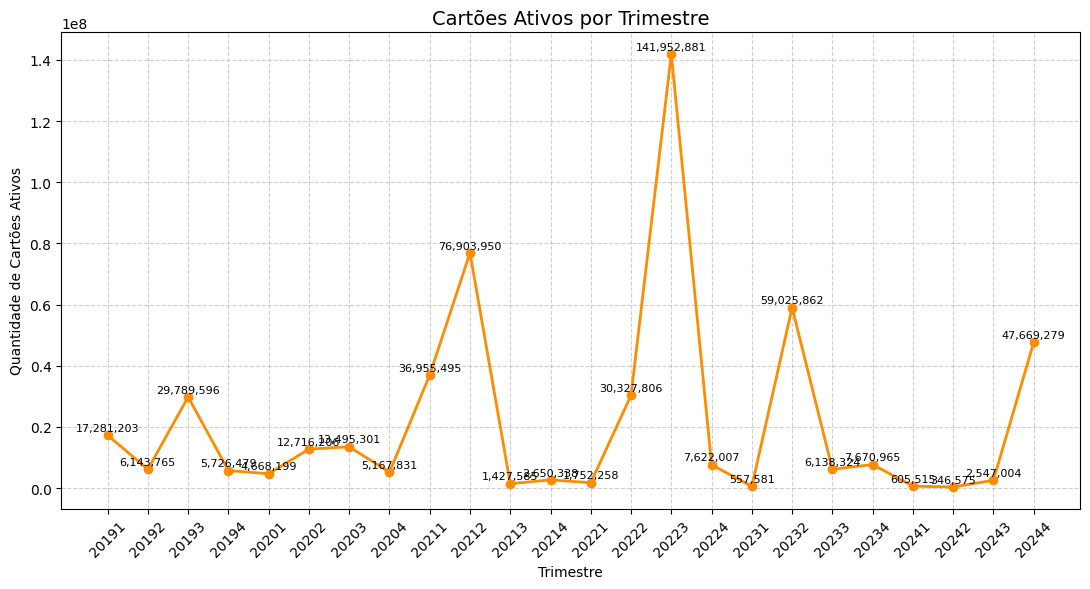

In [ ]:
plt.figure(figsize=(11, 6))
plt.plot(trimestres_ativos, valores_ativos, marker='o', color='darkorange', linewidth=2)
plt.title('Cartões Ativos por Trimestre', fontsize=14)
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Cartões Ativos')
plt.grid(True, linestyle='--', alpha=0.6)

for i, valor in enumerate(valores_ativos):
    plt.text(i, valor + max(valores_ativos)*0.01, f"{valor:,}", ha='center', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>Trimestre com maior e menor emissão</h4>
Ver qual trimestre teve o maior e menor número de cartões emitidos.

In [28]:
df_emitidos_total = df.groupby("trimestre")["qtdcartoesemitidos"].sum().sort_index()
max_emitido = df_emitidos_total.idxmax()
min_emitido = df_emitidos_total.idxmin()

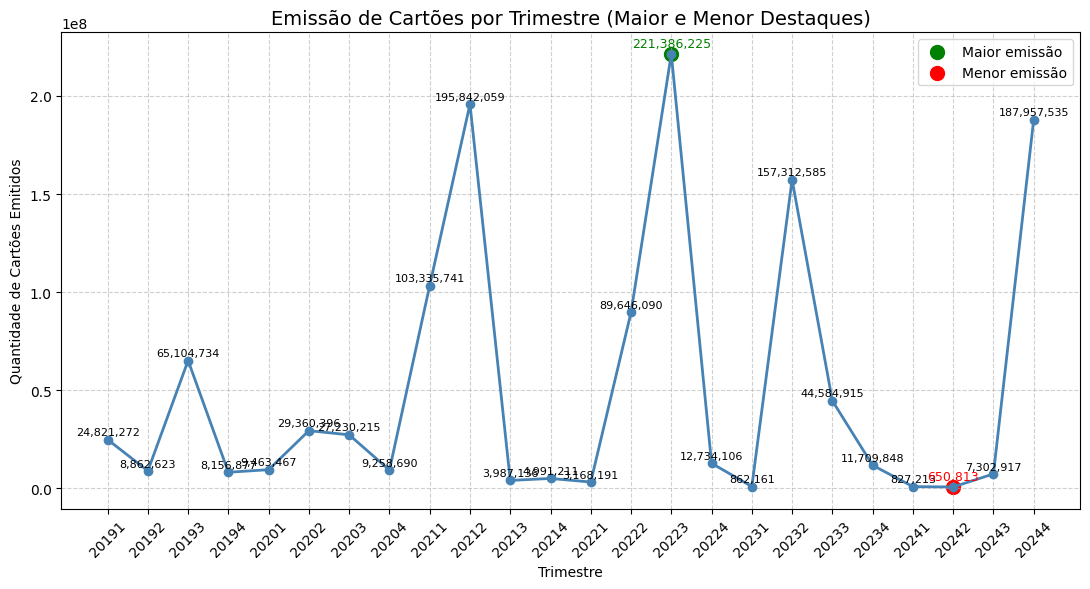

In [ ]:
trimestres = df_emitidos_total.index
valores = df_emitidos_total.values

plt.figure(figsize=(11, 6))
plt.plot(trimestres, valores, marker='o', color='steelblue', linewidth=2)
plt.title('Emissão de Cartões por Trimestre (Maior e Menor Destaques)', fontsize=14)
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Cartões Emitidos')
plt.grid(True, linestyle='--', alpha=0.6)

for i, (trimestre, valor) in enumerate(zip(trimestres, valores)):
    if trimestre == max_emitido:
        plt.scatter(i, valor, color='green', s=100, label='Maior emissão')
        plt.text(i, valor + max(valores)*0.015, f"{valor:,}", ha='center', fontsize=9, color='green')
    elif trimestre == min_emitido:
        plt.scatter(i, valor, color='red', s=100, label='Menor emissão')
        plt.text(i, valor + max(valores)*0.015, f"{valor:,}", ha='center', fontsize=9, color='red')
    else:
        plt.text(i, valor + max(valores)*0.01, f"{valor:,}", ha='center', fontsize=8)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<h4>Cartões ativos sobre emitidos por função (crédito, débito…)</h4>
Pra ver qual tipo de cartão tem maior taxa de ativação.

In [23]:
df_func = df.groupby("nomefuncao")[["qtdcartoesemitidos", "qtdcartoesativos"]].sum()
df_func["percentual_ativo"] = (df_func["qtdcartoesativos"] / df_func["qtdcartoesemitidos"]) * 100

for funcao in df_func.index:
    print(f"{funcao}: {df_func.loc[funcao, 'percentual_ativo']:.2f}% ativos")

Crédito: 56.28% ativos
Débito: 35.86% ativos
Pré-Pago: 22.15% ativos


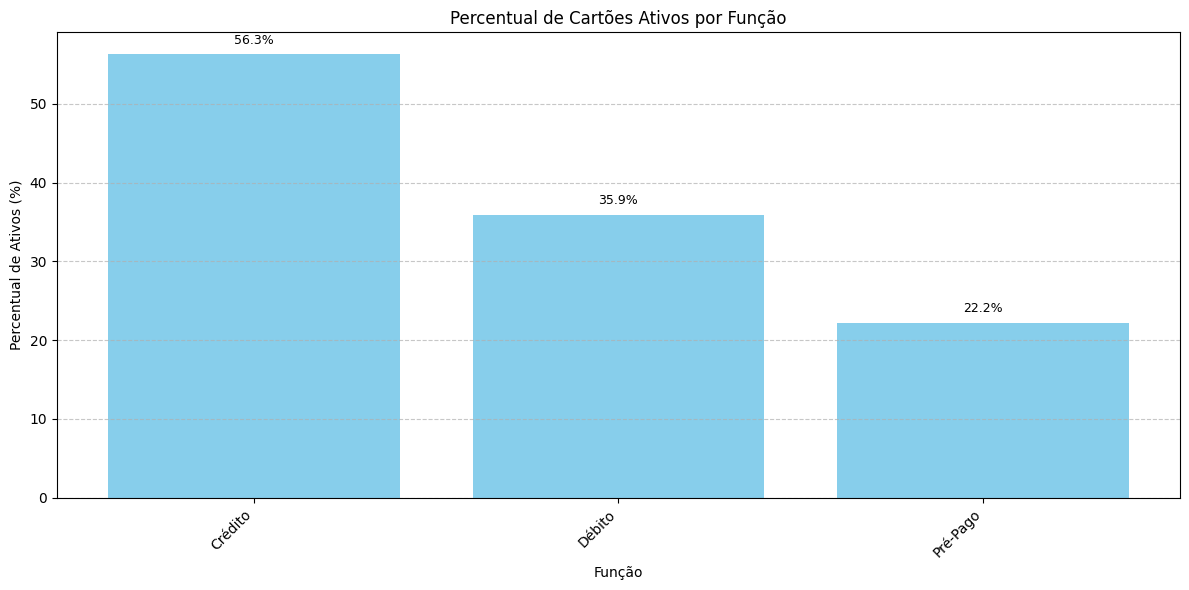

In [ ]:
df_func = df.groupby("nomefuncao")[["qtdcartoesemitidos", "qtdcartoesativos"]].sum()
df_func["percentual_ativo"] = (df_func["qtdcartoesativos"] / df_func["qtdcartoesemitidos"]) * 100

plt.figure(figsize=(12, 6))
percentuais = df_func["percentual_ativo"].sort_values(ascending=False)
bars = plt.bar(percentuais.index, percentuais.values, color="skyblue")

plt.title("Percentual de Cartões Ativos por Função")
plt.ylabel("Percentual de Ativos (%)")
plt.xlabel("Função")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Produto ou bandeira com mais cartões ativos (ou maior % de ativação)

In [24]:
df_prod = df.groupby("produto")[["qtdcartoesemitidos", "qtdcartoesativos"]].sum()
df_prod["percentual_ativo"] = (df_prod["qtdcartoesativos"] / df_prod["qtdcartoesemitidos"]) * 100
df_prod = df_prod.sort_values("percentual_ativo", ascending=False)

print("Top 5 produtos com maior taxa de ativação:\n")
for produto in df_prod.head(5).index:
    print(f"{produto}: {df_prod.loc[produto, 'percentual_ativo']:.2f}%")


Top 5 produtos com maior taxa de ativação:

Premium: 76.33%
Platinum: 72.60%
Intermediário: 64.82%
Corporativo: 63.02%
Empresarial: 47.91%


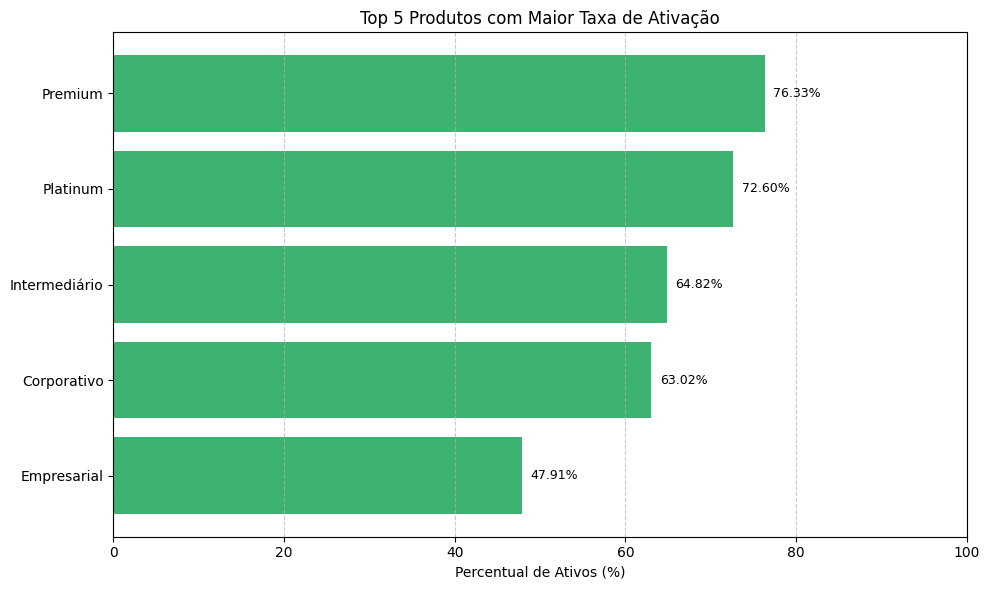

In [ ]:
df_prod = df.groupby("produto")[["qtdcartoesemitidos", "qtdcartoesativos"]].sum()
df_prod["percentual_ativo"] = (df_prod["qtdcartoesativos"] / df_prod["qtdcartoesemitidos"]) * 100
df_prod = df_prod.sort_values("percentual_ativo", ascending=False)

top5 = df_prod.head(5)

plt.figure(figsize=(10, 6))
bars = plt.barh(top5.index[::-1], top5["percentual_ativo"][::-1], color="mediumseagreen")

plt.title("Top 5 Produtos com Maior Taxa de Ativação")
plt.xlabel("Percentual de Ativos (%)")
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}%", va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [25]:
df_prod = df.groupby("produto")[["qtdcartoesemitidos", "qtdcartoesativos"]].sum()
df_prod["percentual_ativo"] = (df_prod["qtdcartoesativos"] / df_prod["qtdcartoesemitidos"]) * 100
df_prod = df_prod.sort_values("percentual_ativo", ascending=True)

print("Top 5 produtos com menor taxa de ativação:\n")
for produto in df_prod.head(5).index:
    print(f"{produto}: {df_prod.loc[produto, 'percentual_ativo']:.2f}%")


Top 5 produtos com menor taxa de ativação:

Básico Internacional: 29.53%
Básico Nacional: 36.98%
Outros: 39.19%
Empresarial: 47.91%
Corporativo: 63.02%


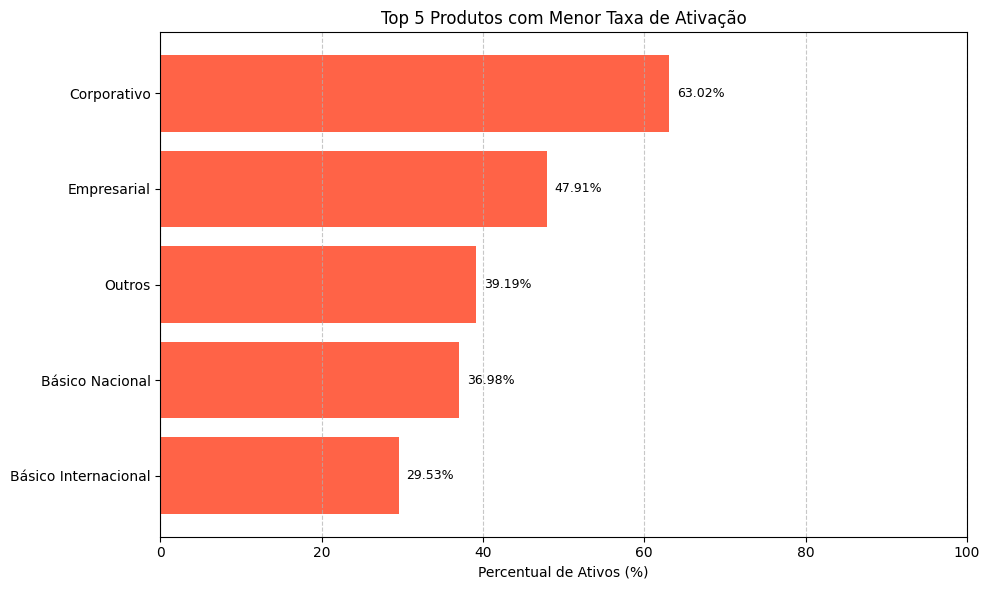

In [36]:
df_prod = df.groupby("produto")[["qtdcartoesemitidos", "qtdcartoesativos"]].sum()
df_prod["percentual_ativo"] = (df_prod["qtdcartoesativos"] / df_prod["qtdcartoesemitidos"]) * 100
df_prod = df_prod.sort_values("percentual_ativo", ascending=True)

top5_menor = df_prod.head(5)

plt.figure(figsize=(10, 6))
bars = plt.barh(top5_menor.index, top5_menor["percentual_ativo"], color="tomato")

plt.title("Top 5 Produtos com Menor Taxa de Ativação")
plt.xlabel("Percentual de Ativos (%)")
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}%", va='center', fontsize=9)

plt.tight_layout()
plt.show()
